## Exercise 1

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Visualize using PCA (2 components)
# Reduce the data with PCA

# You need to populate the following variable


/home/codespace/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
pca = PCA()
X_mnist_reduced = pca.fit_transform(X_mnist_train)

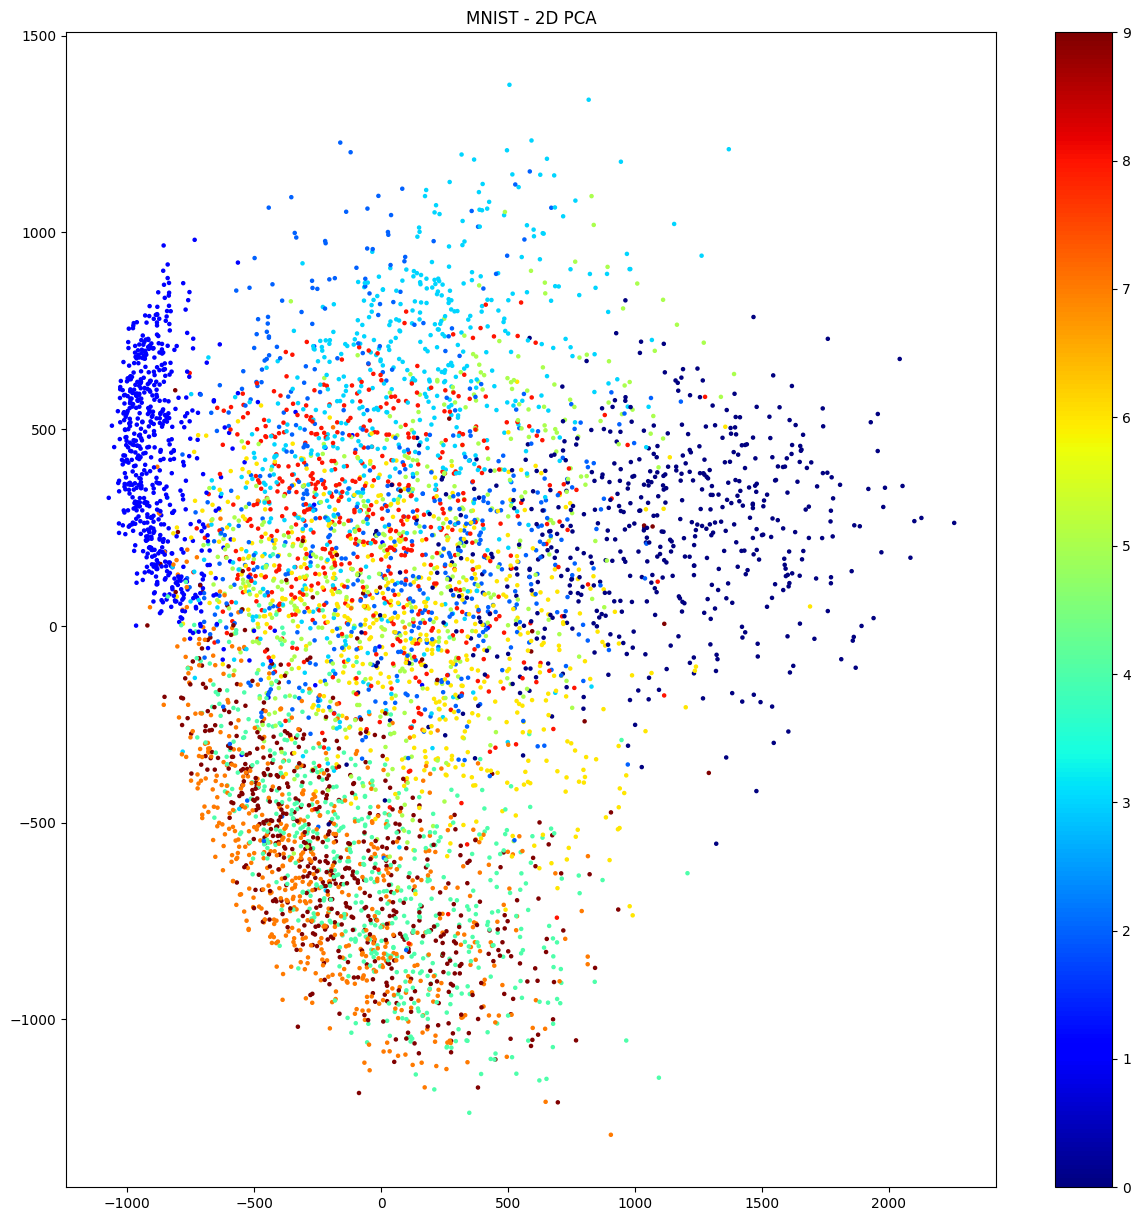

In [3]:
# Now plotting
plt.figure(figsize=(15,15))
plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1], c=y_mnist_train, cmap="jet",s=5)
plt.colorbar()
plt.title("MNIST - 2D PCA")
plt.show()

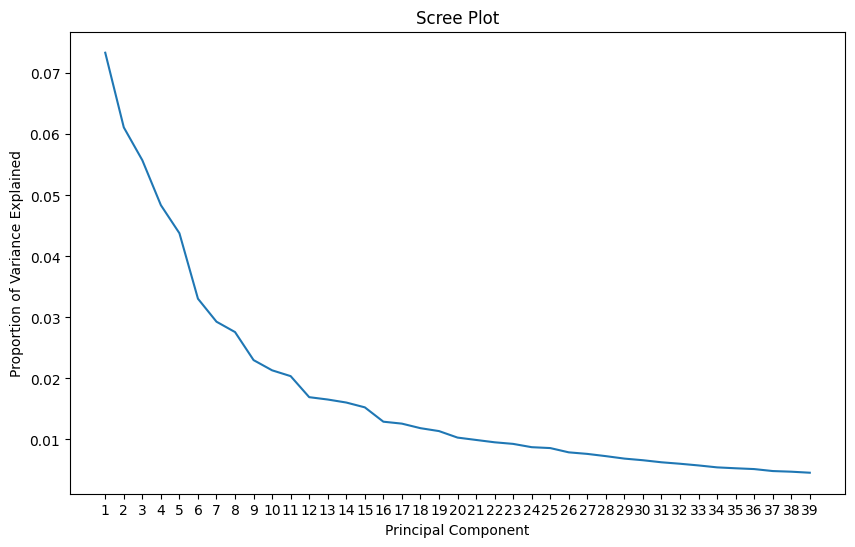

In [4]:
# Step 3: Scree Plot
variance_explained = pca.explained_variance_ratio_[1:40]

# Step 4: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(variance_explained) + 1))
plt.show()

In [6]:
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for desired explained variance
threshold = 0.95  # 95% variance
n_components = np.argmax(cumulative_variance_explained >= threshold) + 1
print(f"Number of components needed for {threshold*100}% variance: {n_components}")


Number of components needed for 95.0% variance: 148


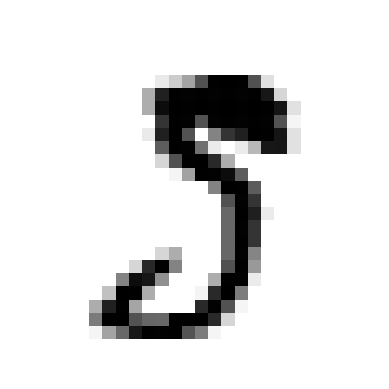

In [7]:
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

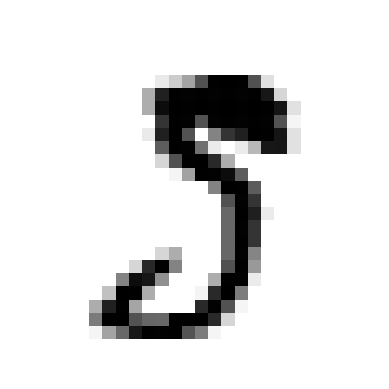

In [13]:
pca_test = PCA(n_components=768)
xr = pca_test.fit_transform(X_mnist_train)
x_regen  = pca_test.inverse_transform(xr[0])
plot_mnist_digit(x_regen)

In [14]:
# Step 5: k-NN Classification
# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

# With PCA
# You have some work to do right here
pca_knn = PCA(.8)
X_train_xf = pca_knn.fit_transform(X_mnist_train)
X_test_xf = pca_knn.transform(X_mnist_test)

knn = KNeighborsClassifier()
knn.fit(X_train_xf, y_mnist_train)
y_pred_pca = knn.predict(X_test_xf)
print(f"PCA-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_pca)}")

Original Data Accuracy: 0.9421428571428572
PCA-transformed Data Accuracy: 0.9528571428571428


## Exercise 2

1. Try using t-SNE to visualize the MNIST data above.  How does it compare to PCA?
2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

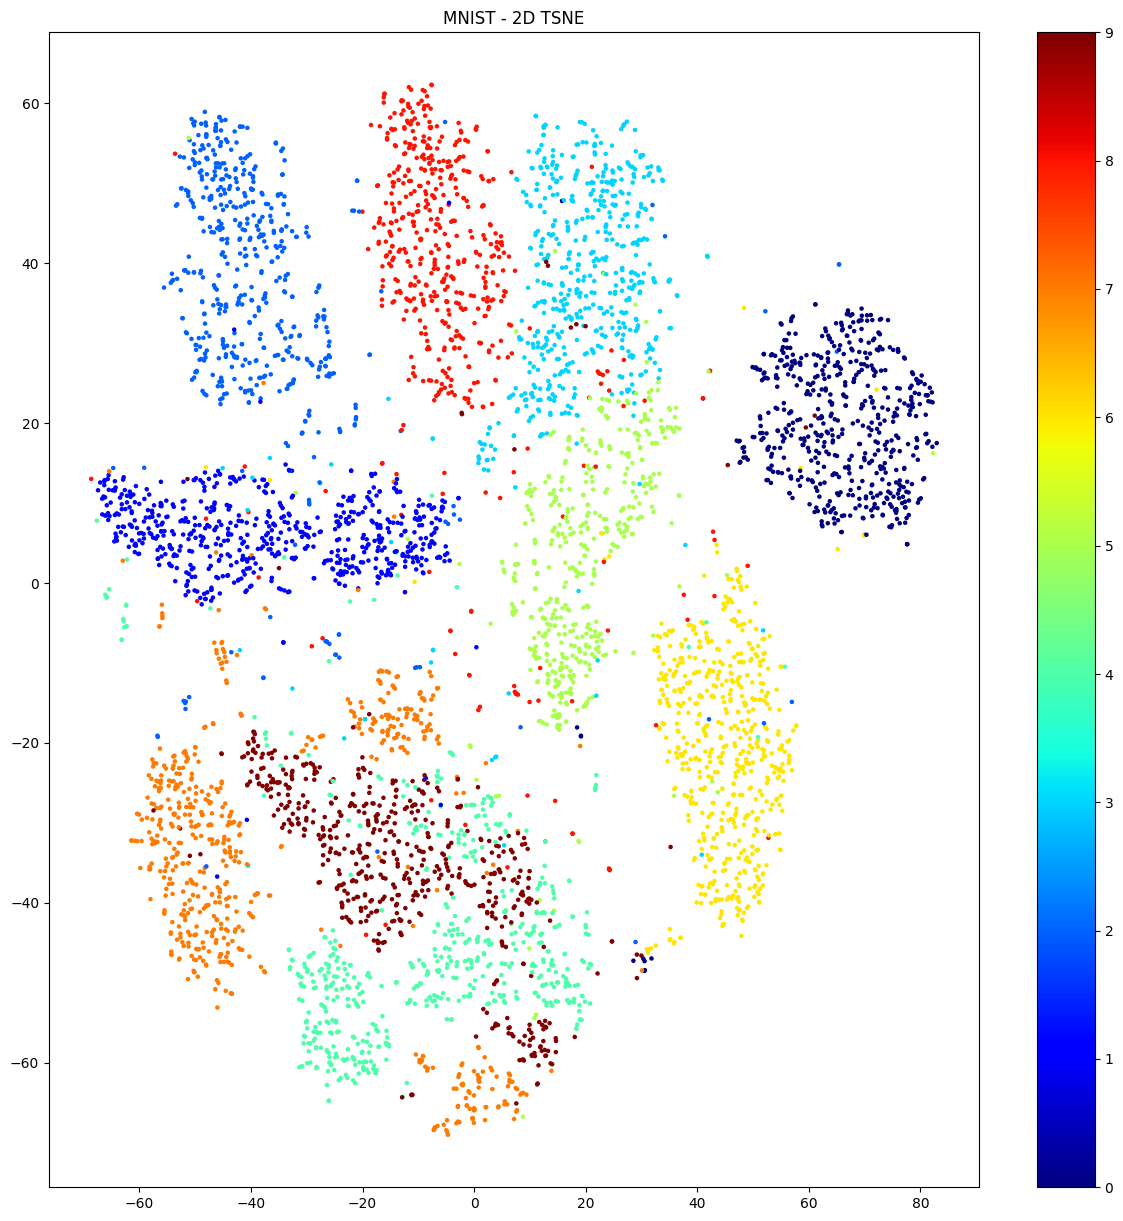

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_mnist_train)

plt.figure(figsize=(15,15))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_mnist_train, cmap="jet",s=5)
plt.colorbar()
plt.title("MNIST - 2D TSNE")
plt.show()

In [19]:

X_tsne = tsne.fit_transform(X)


In [20]:
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

In [21]:

knn = KNeighborsClassifier()
knn.fit(X_train_tsne, y_train_tsne)
y_pred_tsne = knn.predict(X_test_tsne)
print(f"TSNE-transformed Data Accuracy: {accuracy_score(y_test_tsne, y_pred_tsne)}")

TSNE-transformed Data Accuracy: 0.9392857142857143


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first, and then calculate accuracy with KNN.

In [40]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.1 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 44.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.2 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 29.4 MB/s eta 0:00:00:00:0100:01
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=931e6c7e311fcbc3de874e22b2dc952ba71b67e306b70ae1de2df9d250b2b8b7
  Stored in directory: /home/codespace/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn

[notice] A new release of pip is availa

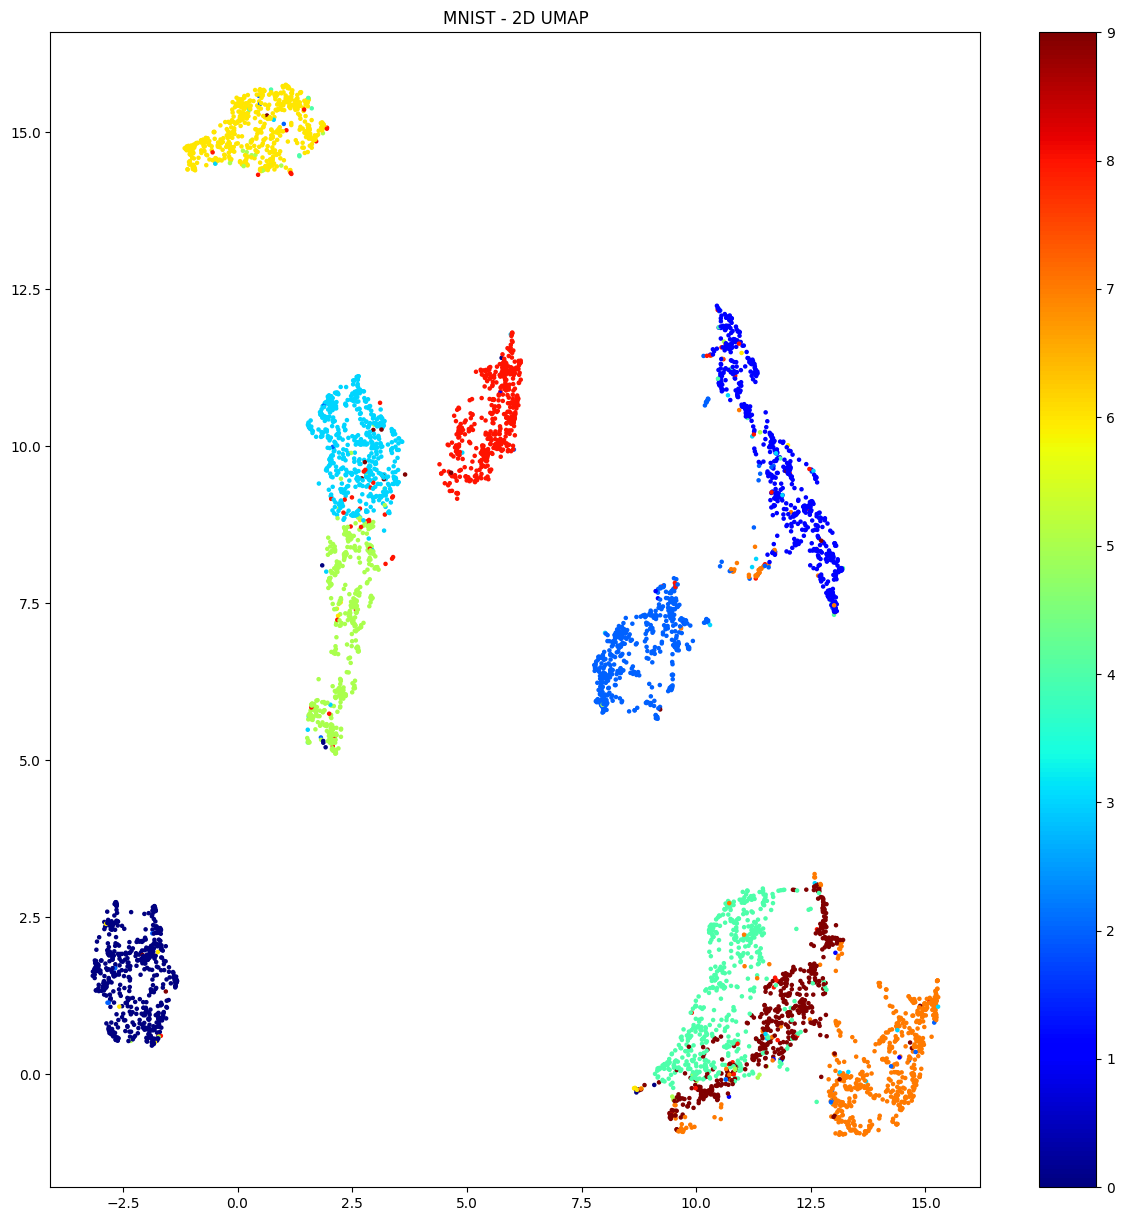

In [37]:
import umap
umap_model = umap.UMAP(n_neighbors=8, min_dist=0.01, n_components=2)
X_umap_train = umap_model.fit_transform(X_mnist_train)
plt.figure(figsize=(15,15))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_mnist_train, cmap="jet",s=5)
plt.colorbar()
plt.title("MNIST - 2D UMAP")
plt.show()

In [36]:
X_umap_test = umap_model.transform(X_mnist_test)
knn = KNeighborsClassifier()
knn.fit(X_umap_train, y_mnist_train)
y_pred_umap = knn.predict(X_umap_test)
print(f"Umap-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_umap)}")

Umap-transformed Data Accuracy: 0.8428571428571429


## Exercise 4

Try exploring the impact of dimensionality reduction using the following sample data.

1. How does a KNN classifier do as the number of dimensions increases?
2. Apply a PCA that captures 90% of the variance. Does it help?
3. Does UMAP help?
4. What explains the difference? 

Original Data Accuracy: 0.926


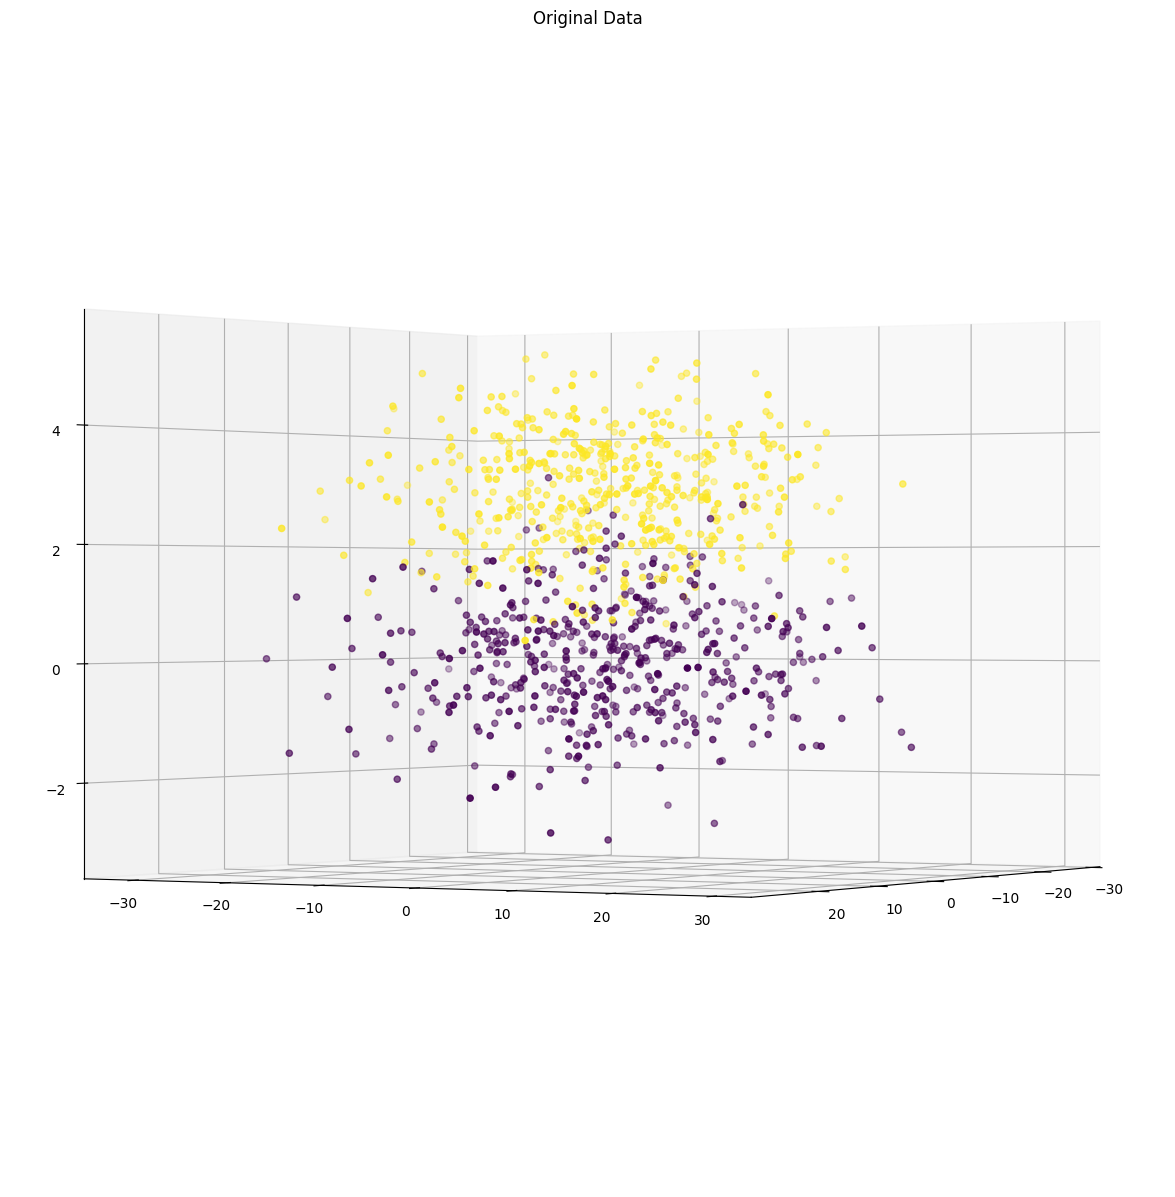

In [39]:
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=3, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [40]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.87


In [41]:
pca = PCA(.9)
X_train_xf = pca.fit_transform(X_train)
knn = KNeighborsClassifier()
knn.fit(X_train_xf, y_train)

X_test_xf = pca.transform(X_test)
y_pred_pca = knn.predict(X_test_xf)


print(f"PCA transformed Accuracy: {accuracy_score(y_test, y_pred_pca)}")

PCA transformed Accuracy: 0.505


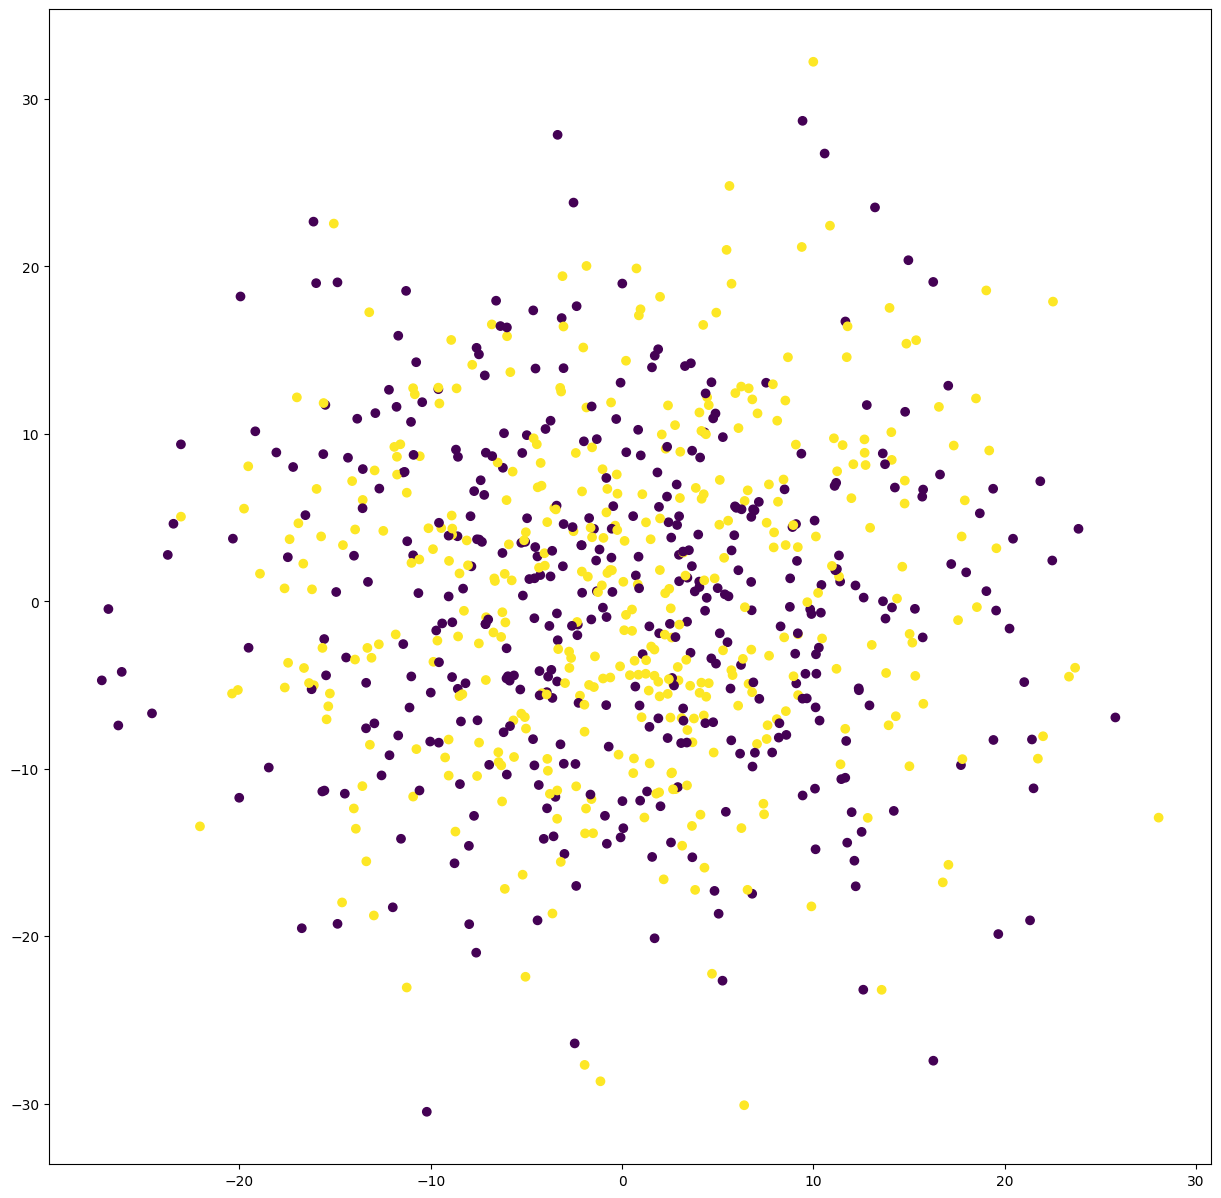

In [42]:
plt.figure(figsize=(15,15))
plt.scatter(X_train_xf[:, 0], X_train_xf[:, 1], c=y_train, cmap="viridis")

In [47]:
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.5, n_components=2)
X_train_umap = umap_model.fit_transform(X_train)
knn = KNeighborsClassifier()
knn.fit(X_train_umap, y_train)

X_test_umap = umap_model.transform(X_test)
y_pred_umap = knn.predict(X_test_umap)


print(f"UMAP transformed Accuracy: {accuracy_score(y_test, y_pred_umap)}")

UMAP transformed Accuracy: 0.765


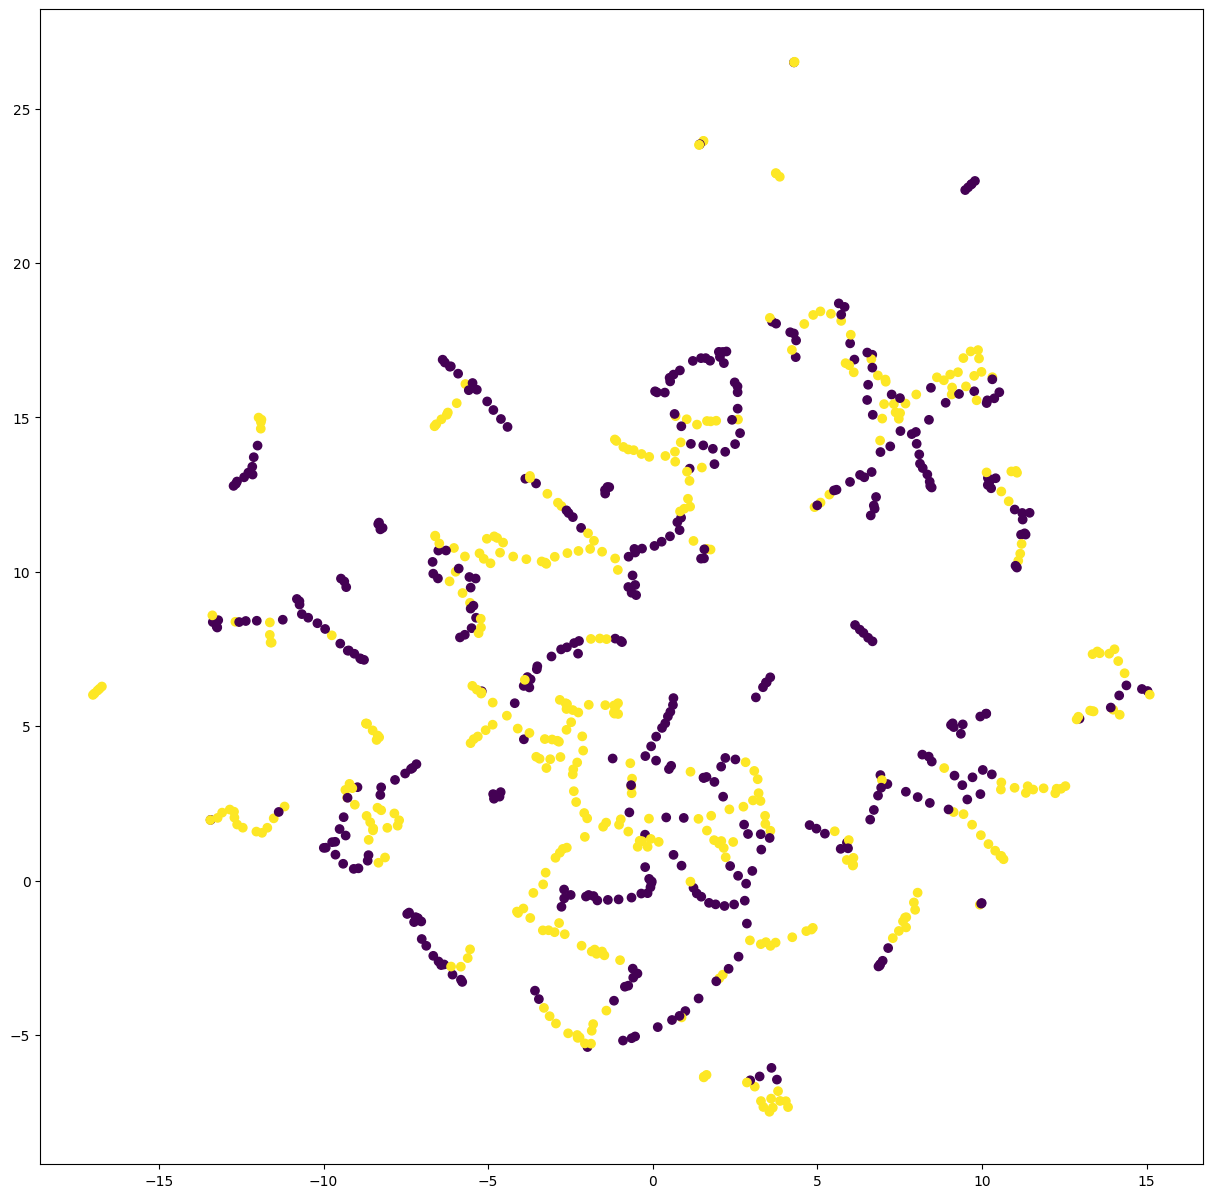

In [48]:
plt.figure(figsize=(15,15))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="viridis")